In [40]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.linalg import eigh
from math import *

In [2]:
#Given in problem
mean= np.array([[1],[2]])
C = np.array([[1.6250, 1.9486*-1],[1.9486*-1, 3.8750]])
print('Mean vector:\n',mean,'\n\nCovariance matrix:\n',C)

Mean vector:
 [[1]
 [2]] 

Covariance matrix:
 [[ 1.625  -1.9486]
 [-1.9486  3.875 ]]


In [3]:
mean.shape,C.shape

((2, 1), (2, 2))

**Part a:** (5 points) Describe and justify your method for generating sample points from the 2D Gaussian.

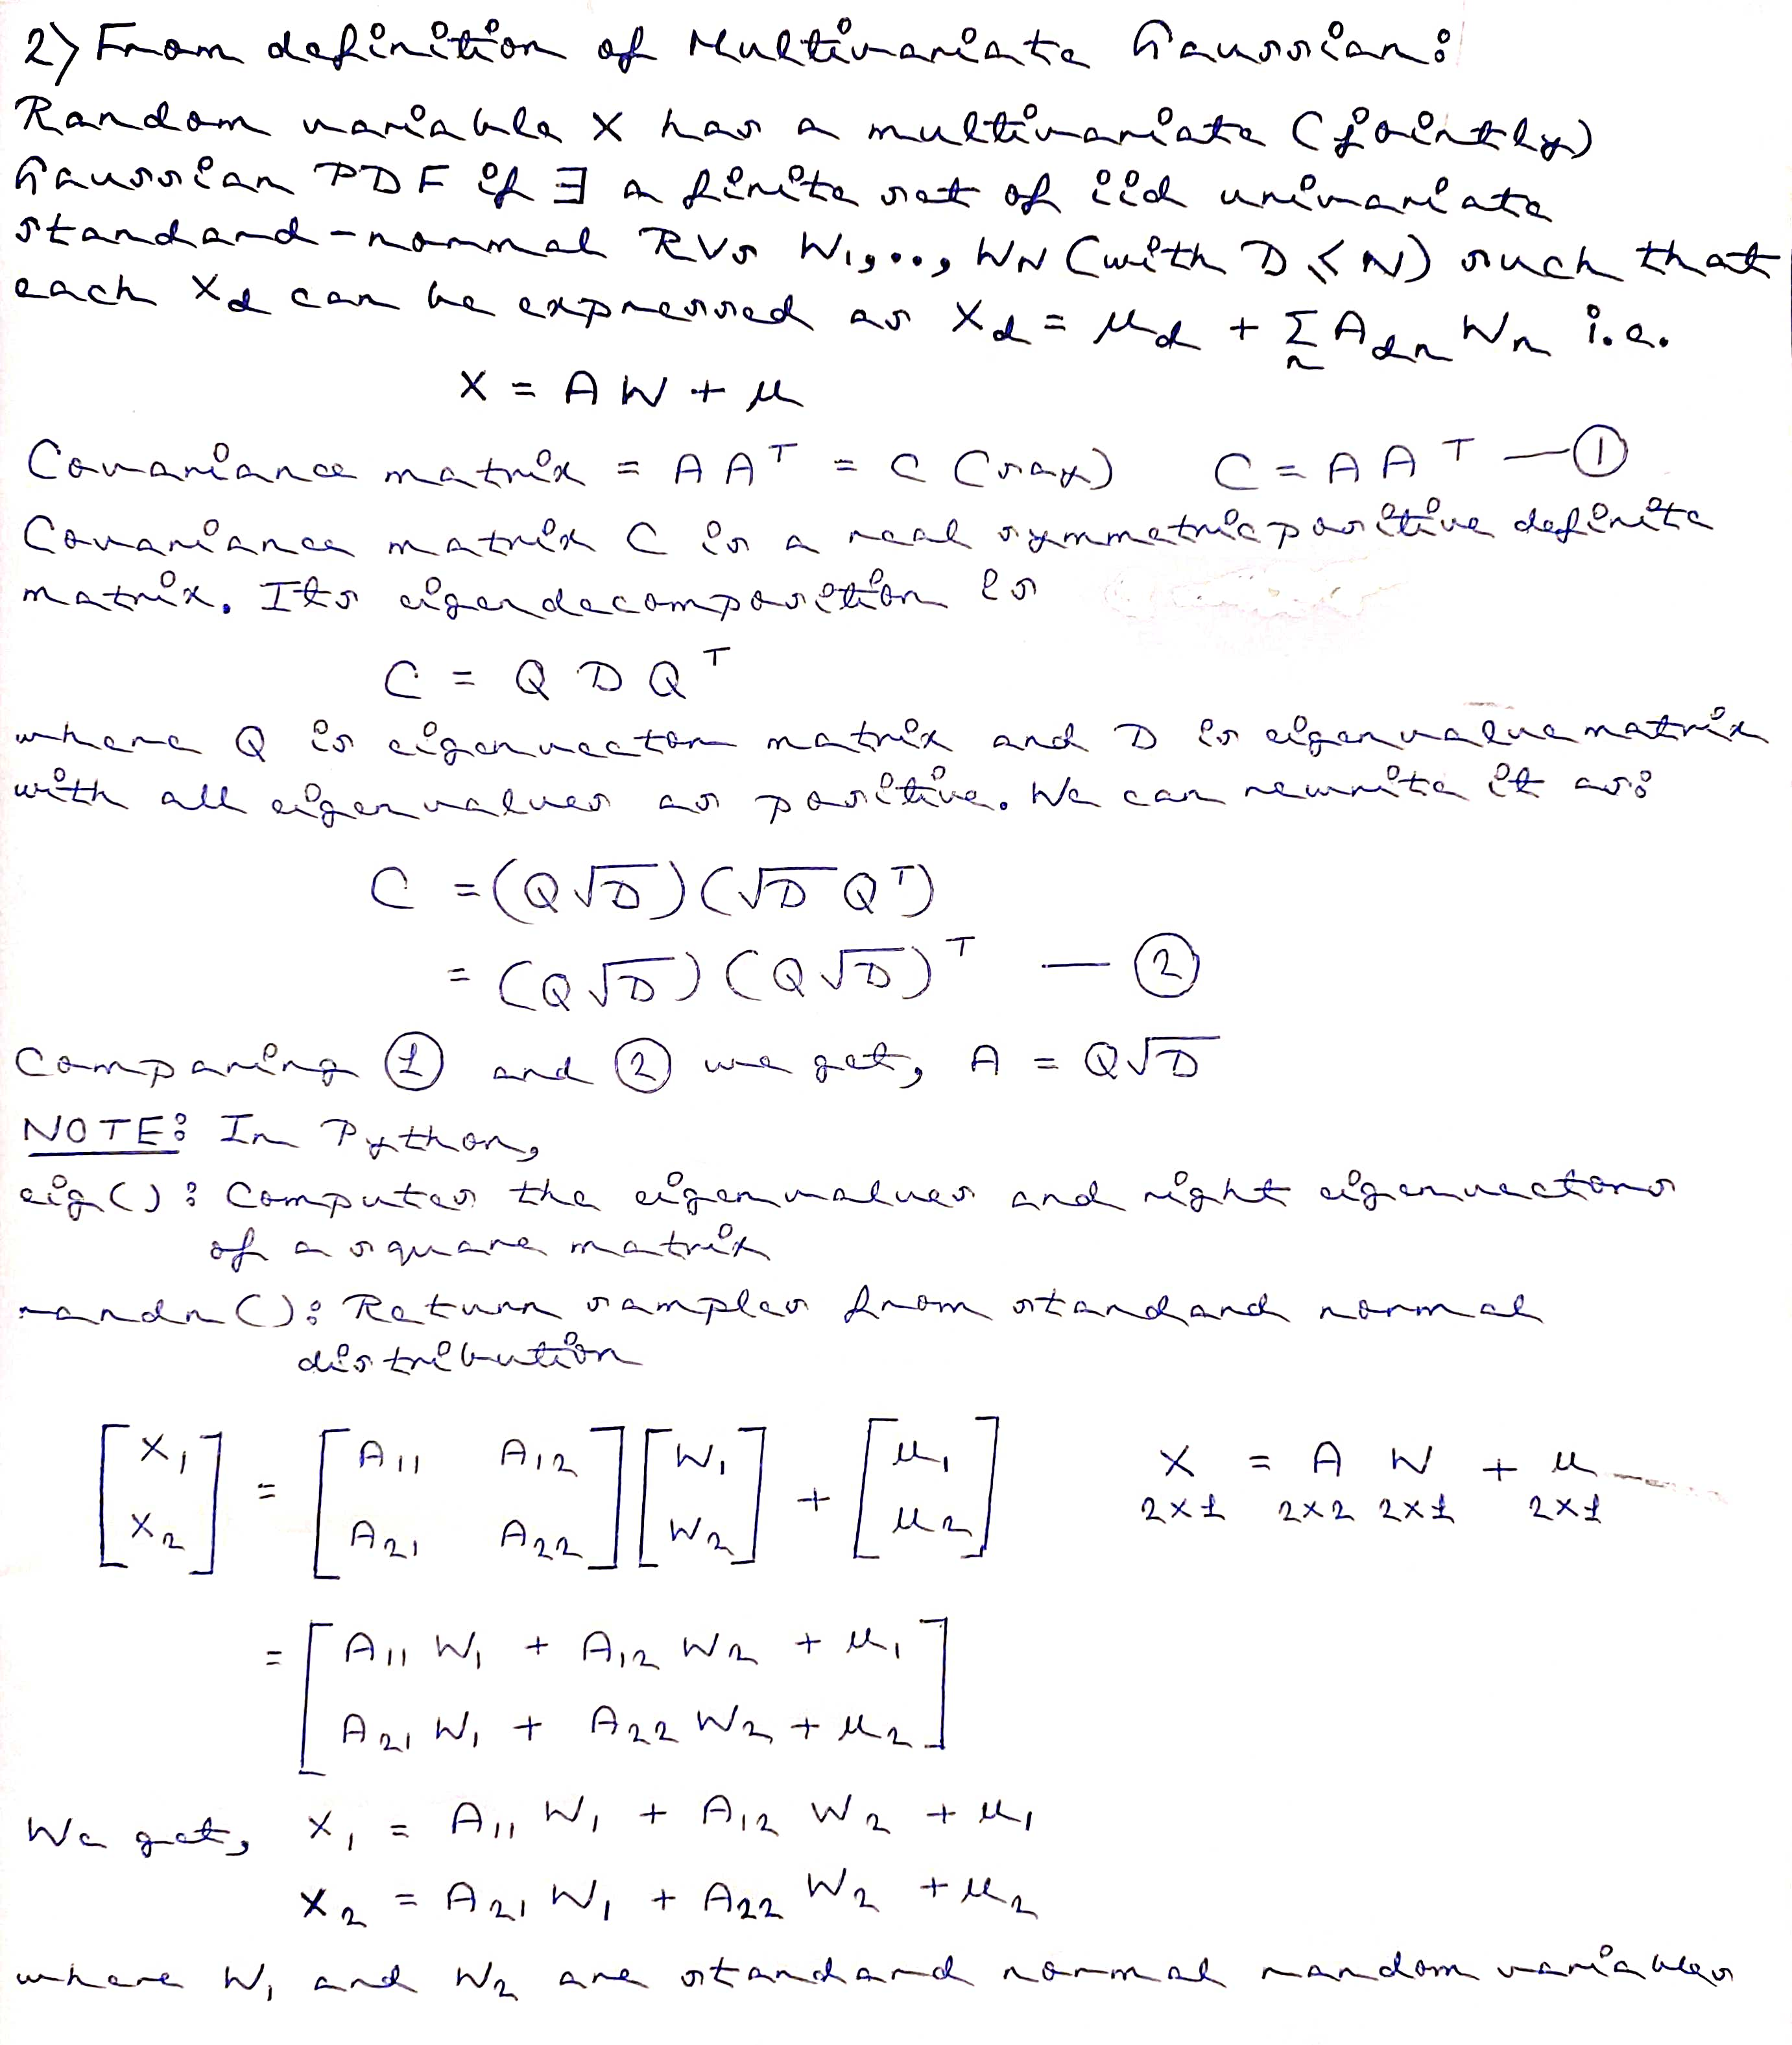
So we generate random draw of W using randn() function and then use $X = AW + µ$ to generate random draw from X which corresponds to given Multivariate Gaussian.<br><br>

<b>Method for generating sample points from the 2D Gaussian</b><br><br>
Step 1. Using eig() function, we obtain the eigenvalues and eigenvectors(Q) of the covariance matrix(C) .<br>
Step 2. We create a diagonal matrix D using the eigenvalues obtained in Step 1.This is the eigenvalue matrix(D).<br>        
Step 3: $A = Q\sqrt{D}$<br>
Step 4: W = [W<sub>1</sub>,W<sub>2</sub>]<sup>T</sup> where W1 and W2 are standard normal random variables. We use randn() to generate random draws from standard normal distribution. Then $X = AW + µ$ gives us random draws from Multivariate Gaussian with mean vector µ and covariance matrix AA<sup>T</sup>

In [4]:
E , Q = np.linalg.eig(C) #Q is the eigenvector matrix
D = np.diag(E) #Diagonal matrix with eigenvalues along the diagonal, Eigenvalue matrix
A = np.matmul(Q,np.sqrt(D)) #Computing A
print('A:\n',A)

A:
 [[-0.61234803  1.11804735]
 [-0.35354319 -1.93649354]]


In [5]:
W = np.random.randn(2,1) #standard normal samples
X = np.matmul(A,W) + mean #samples of given multivariate 2D Gaussian
X

array([[0.36718073],
       [0.60142946]])

In [6]:
#Function to generate N random samples of multivariate 2D Gaussian
def random_samples(N,A,mean):
    L = [] #list to store the generated samples
    for _ in range(N): 
        w = np.random.randn(2,1) 
        x = np.matmul(A,w) + mean #X = AW + µ 
        L.append(x)    
    return L

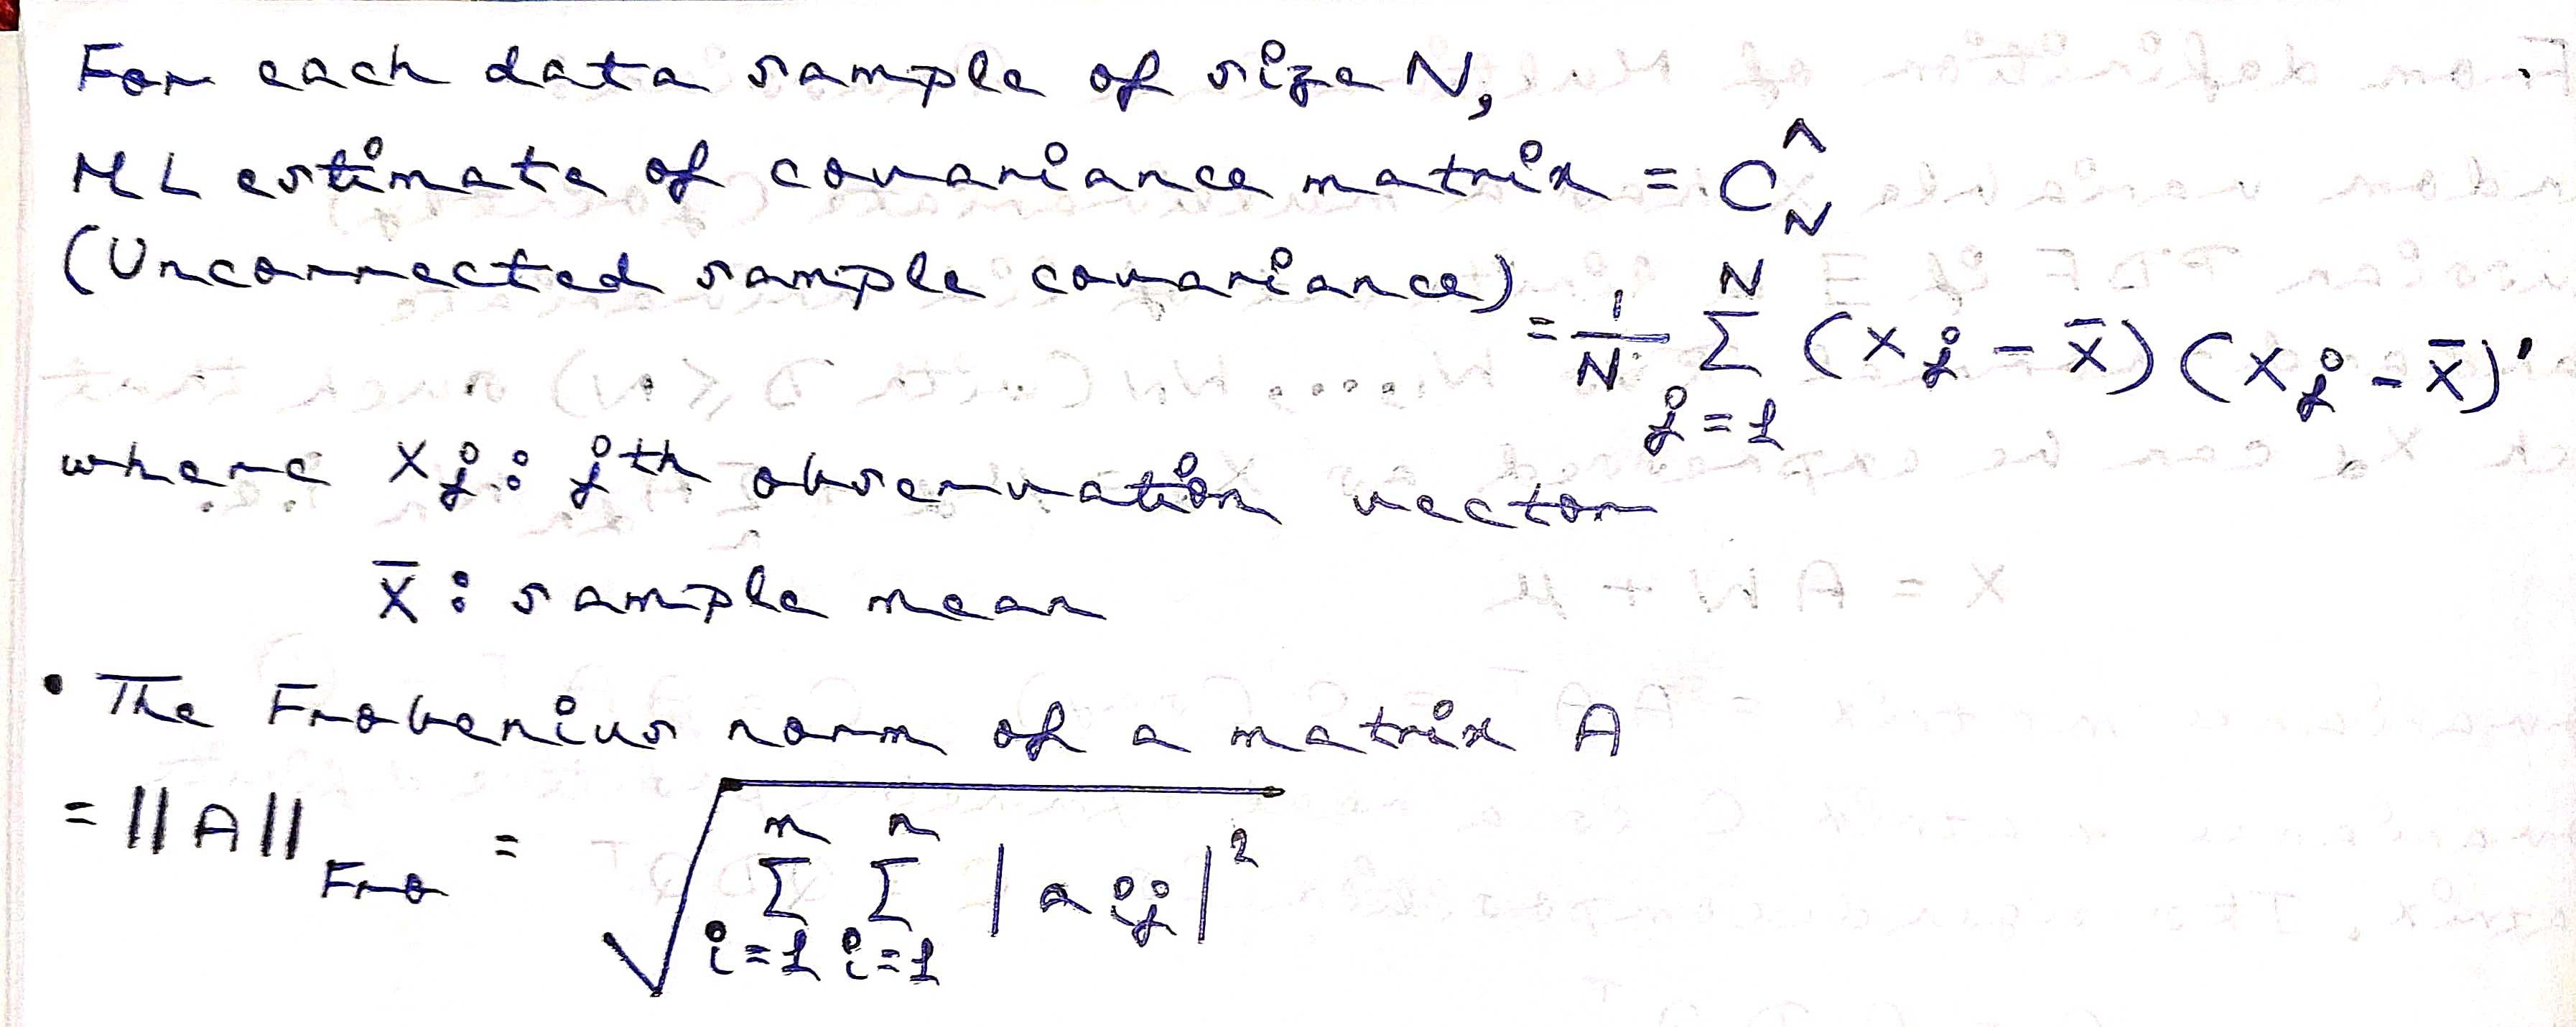

In [7]:
#L2 norm of a vector
def L2_norm(x):
    s = 0 #variable to store the squared sum
    for i in range(len(x)):
        s += x[i][0]**2
    return sqrt(s)

#Frobenius norm of a matrix
def frobenius(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    s = 0
    for i in range(rows):
        for j in range(cols):
            s += matrix[i][j]*matrix[i][j]
    return sqrt(s) 

In [8]:
#ML estimate for mean
def compute_sample_mean(sample):
    n = len(sample)
    sample_mean = sum(sample)/n
    return sample_mean

#ML estimate for covariance
def compute_sample_covariance(sample):
    sample_mean = compute_sample_mean(sample)
    n = len(sample)
    s = np.zeros((2,2))
    z = [] #list for storing intermediate values
    for j in range(n):
        d = sample[j] - sample_mean
        z.append(np.matmul(d,np.transpose(d)))
    sample_covariance = sum(z)/n
    return sample_covariance

In [9]:
N = [10, 10**2, 10**3, 10**4, 10**5]

**Part b:**

In [10]:
def experiment(N,M=100):
    error_list =[]
    µ_true = np.array([[1],[2]])
    #Repeating the experiment M times
    for i in range(M):
        sample = random_samples(N,A,mean) #Generating the data
        µ_hat = compute_sample_mean(sample)
        e = µ_true - µ_hat
        error = L2_norm(e)/L2_norm(µ_true)
        error_list.append(error)
    return error_list

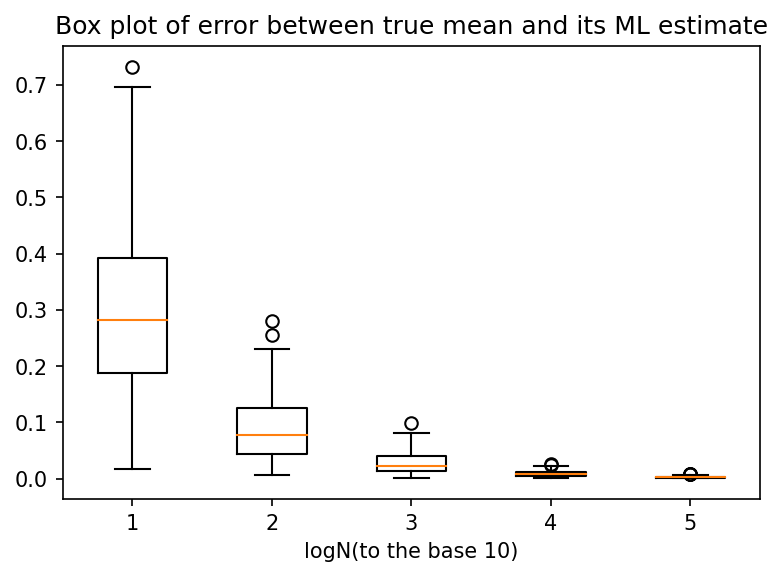

<Figure size 432x288 with 0 Axes>

In [11]:
E_list = []
for n in N:
    E_list.append(experiment(n))

#Box plot    
plt.figure(dpi=150)
plt.boxplot(E_list,labels=['1','2','3','4','5'])# Using a logarithmic scale on the horizontal axis
plt.xlabel('logN(to the base 10)')
plt.title('Box plot of error between true mean and its ML estimate')
plt.show()
plt.savefig('Box_plot_mean.png')

**Part c:**

In [12]:
def experiment_covariance(N,M=100):
    error_list =[]
    for i in range(M):#Repeating the experiment M times
        sample = random_samples(N,A,mean) #Generating the data
        sample_covariance = compute_sample_covariance(sample)
        e = C - sample_covariance
        error = frobenius(e)/frobenius(C)
        error_list.append(error)
    return error_list

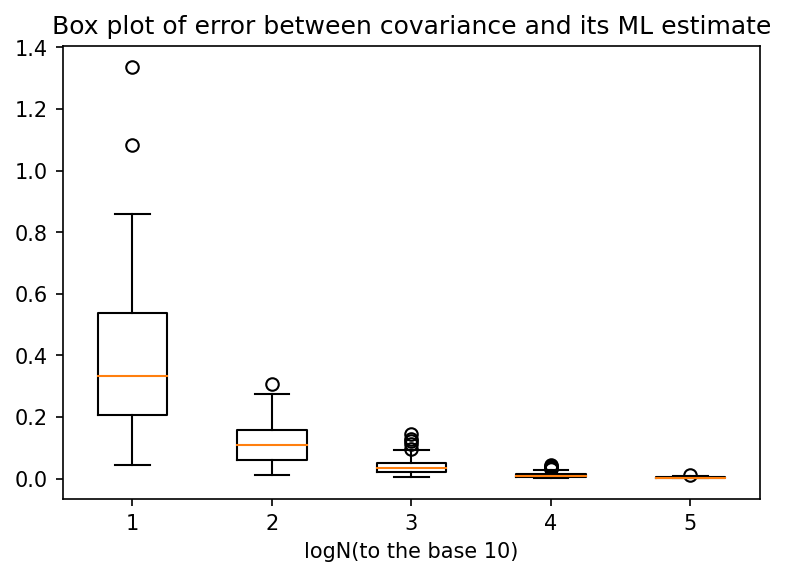

<Figure size 432x288 with 0 Axes>

In [13]:
E_list_c = []
for n in N:
    E_list_c.append(experiment_covariance(n))
    
plt.figure(dpi=150)
plt.boxplot(E_list_c,labels=['1','2','3','4','5']) # Using a logarithmic scale on the horizontal axis
plt.xlabel('logN(to the base 10)')
plt.title('Box plot of error between covariance and its ML estimate')
plt.show()
plt.savefig('Box_plot_covariance.png')

(d) (5 points) For each value of N, for a single data sample, within a single figure, plot the 2D scatter plot of the generated data and show the principal modes of variation of the data by plotting a line starting at the empirical mean and going a distance equal to the empirical eigen value’s square root along a direction given by the empirical eigen-vector.

Principal modes of variation are directions given by eigenvectors of covariance matrix C.

In [14]:
def extract_X1(sample):
    X1 = []
    for i in range(len(sample)):
        X1.append(sample[i][0][0])
    return X1

def extract_X2(sample):
    X2 = []
    for i in range(len(sample)):
        X2.append(sample[i][1][0])
    return X2 

In [15]:
def line(start,e,q):
    x , y = start
    l = sqrt(e) #length
    angle = atan(q[0]/q[1])
    endx = x + l * cos(angle)
    endy = y + l * sin(angle)
    x_points = np.linspace(start=x, stop=endx, num=100)
    y_points = np.linspace(start=y, stop=endy, num=100)
    return (x_points,y_points)

In [16]:
def compute_data_matrix(dataset):
  D = []
  n = len(dataset)
  for p in range(784):
    d = []
    for i in range(n):
      d.append(dataset[i][p][0])
    D.append(d)
  return D

**For N = 10:**

In [169]:
sample = random_samples(10,A,mean)#Generating samples

X1 = extract_X1(sample)
X2 = extract_X2(sample)
    
start = compute_sample_mean(sample)
eigenvalues,eigenvectors = eigh(compute_sample_covariance(sample))

In [170]:
data_matrix = np.transpose(np.array(sample).reshape(10,2))

In [171]:
data_matrix

array([[ 0.27865698, -1.21424189,  1.69172775,  1.52723405,  2.53538168,
         2.40436561, -0.02722851,  1.98734189,  2.08645223,  2.99790968],
       [ 3.51202727,  4.73228194,  2.22037857,  1.93078125, -0.44681574,
        -1.80397672,  0.65578224,  0.80944099,  0.04582575,  1.09039422]])

In [172]:
e1 = eigenvalues[-1] #largest eigenvalue
e2 = eigenvalues[-2]
eigenvalues,e1,e2

(array([0.55898526, 4.31710255]), 4.317102554614305, 0.5589852645965568)

In [173]:
v1 = eigenvectors[-1] #1st principal eigenvalue
v2 = eigenvectors[-2] #2nd principal eigenvalue
eigenvectors,v1,v2

(array([[-0.85200894, -0.52352723],
        [-0.52352723,  0.85200894]]),
 array([-0.52352723,  0.85200894]),
 array([-0.85200894, -0.52352723]))

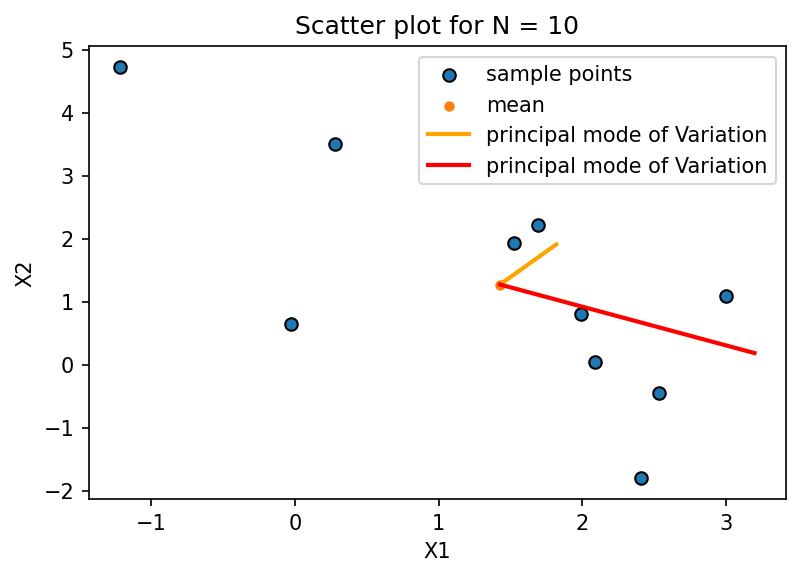

<Figure size 432x288 with 0 Axes>

In [174]:
plt.figure(dpi=150)
plt.title('Scatter plot for N = 10')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1,X2,edgecolor ="black",label='sample points')
plt.scatter(start[0][0],start[1][0],edgecolor ="white",label='mean')#The red dot is the sample mean

x11,x21 = line(start,eigenvalues[-1],eigenvectors[:,-1])
x12,x22 = line(start,eigenvalues[-2],eigenvectors[:,-2])
plt.plot(x12,x22,color='orange',linewidth=2.0,label='principal mode of Variation')
plt.plot(x11,x21,color='red',linewidth=2.0,label='principal mode of Variation')

'''
# Vector origin location
X = [start[0][0]]
Y = [start[1][0]]

# Directional vectors
U1 = [v1[0]*sqrt(e1)]
V1 = [v1[1]*sqrt(e1)]

plt.quiver(X, Y, U1, V1, color='b', units='xy', scale=1)

# Directional vectors
U2 = [v2[0]*sqrt(e2)]  
V2 = [v2[1]*sqrt(e2)]

plt.quiver(X, Y, U2, V2, color='b', units='xy', scale=1)
'''

plt.legend()
plt.show()
plt.savefig('Scatter plot for N = 10.png')

**For N = 100:**

In [175]:
sample = random_samples(10**2,A,mean)#Generating samples

X1 = extract_X1(sample)
X2 = extract_X2(sample)
    
start = compute_sample_mean(sample)
eigenvalues,eigenvectors = eigh(compute_sample_covariance(sample))

In [176]:
e1 = eigenvalues[-1] # largest eigenvalue
e2 = eigenvalues[-2]
v1 = eigenvectors[-1] #1st principal eigenvectoe
v2 = eigenvectors[-2] #2nd principal eigenvectoe

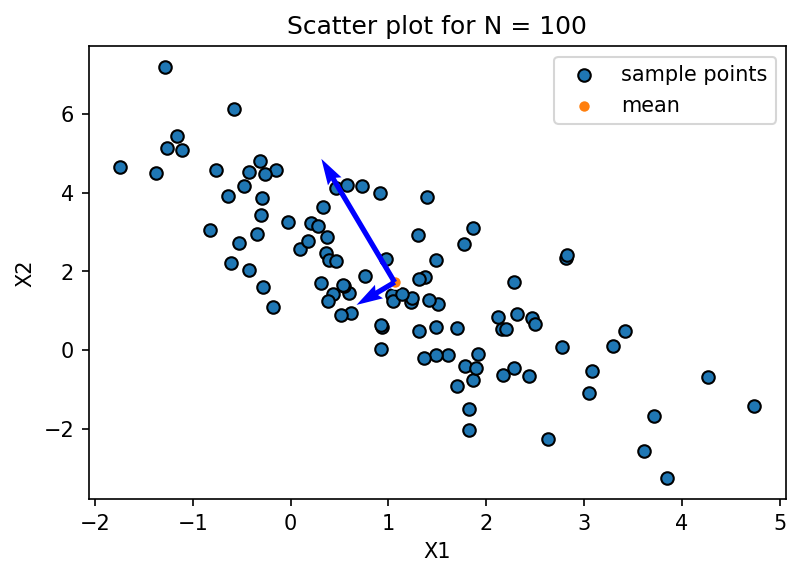

<Figure size 432x288 with 0 Axes>

In [177]:
plt.figure(dpi=150)
plt.title('Scatter plot for N = 100')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1,X2,edgecolor ="black",label='sample points')
plt.scatter(start[0][0],start[1][0],edgecolor ="white",label='mean')#The red dot is the sample mean

#x11,x21 = line(start,eigenvalues[-1],eigenvectors[:,-1])
#x12,x22 = line(start,eigenvalues[-2],eigenvectors[:,-2])
#plt.plot(x12,x22,color='orange',linewidth=2.0,label='principal mode of Variation')
#plt.plot(x11,x21,color='red',linewidth=2.0,label='principal mode of Variation')

# Vector origin location
X = [start[0][0]]
Y = [start[1][0]]

# Directional vectors
U1 = [v1[0]*sqrt(e1)]
V1 = [v1[1]*sqrt(e1)]

plt.quiver(X, Y, U1, V1, color='b', units='xy', scale=1)

# Directional vectors
U2 = [v2[0]*sqrt(e2)]  
V2 = [v2[1]*sqrt(e2)]

plt.quiver(X, Y, U2, V2, color='b', units='xy', scale=1)

plt.legend()
plt.show()
plt.savefig('Scatter plot for N = 100.png')

**For N = 1000:**

In [178]:
sample = random_samples(10**3,A,mean)#Generating samples

X1 = extract_X1(sample)
X2 = extract_X2(sample)
    
start = compute_sample_mean(sample)
eigenvalues,eigenvectors = np.linalg.eigh(compute_sample_covariance(sample))

In [179]:
e1 = eigenvalues[-1] #Largest eigenvalue
e2 = eigenvalues[-2]
v1 = eigenvectors[-1] #1st principal eigenvector
v2 = eigenvectors[-2] #2nd principal eigenvector

In [180]:
e1,e2,v1,v2

(4.905533221734082,
 0.5371641928876413,
 array([-0.48755083,  0.87309461]),
 array([-0.87309461, -0.48755083]))

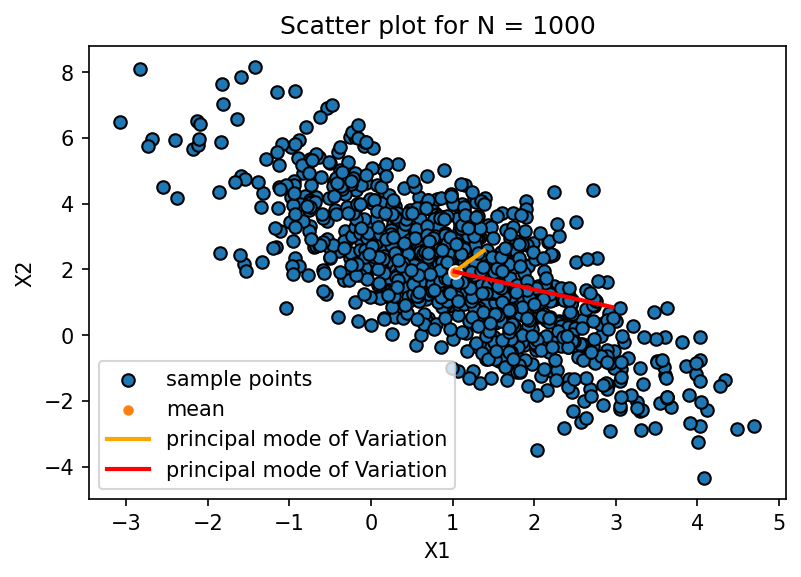

<Figure size 432x288 with 0 Axes>

In [181]:
plt.figure(dpi=150)
plt.title('Scatter plot for N = 1000')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1,X2,edgecolor ="black",label='sample points')
plt.scatter(start[0][0],start[1][0],edgecolor ="white",label='mean')#The red dot is the sample mean

x11,x21 = line(start,eigenvalues[-1],eigenvectors[-1])
x12,x22 = line(start,eigenvalues[-2],eigenvectors[-2])
plt.plot(x12,x22,color='orange',linewidth=2.0,label='principal mode of Variation')
plt.plot(x11,x21,color='red',linewidth=2.0,label='principal mode of Variation')

'''
# Vector origin location
X = [start[0][0]]
Y = [start[1][0]]

# Directional vectors
U1 = [v1[0]*sqrt(e1)]
V1 = [v1[1]*sqrt(e1)]

plt.quiver(X, Y, U1, V1, color='w', units='xy', scale=1)

# Directional vectors
U2 = [v2[0]*sqrt(e2)]  
V2 = [v2[1]*sqrt(e2)]

plt.quiver(X, Y, U2, V2, color='w', units='xy', scale=1)
'''

plt.legend()
plt.show()
plt.savefig('Scatter plot for N = 1000.png')

**For N = 10000:**

In [182]:
sample = random_samples(10**4,A,mean)#Generating samples

X1 = extract_X1(sample)
X2 = extract_X2(sample)
    
start = compute_sample_mean(sample)
eigenvalues,eigenvectors = eigh(compute_sample_covariance(sample))

In [183]:
e1 = eigenvalues[-1] #Largest eigenvalue
e2 = eigenvalues[-2]
v1 = eigenvectors[-1] #1st principal eigenvector
v2 = eigenvectors[-2] #2nd principal eigenvector

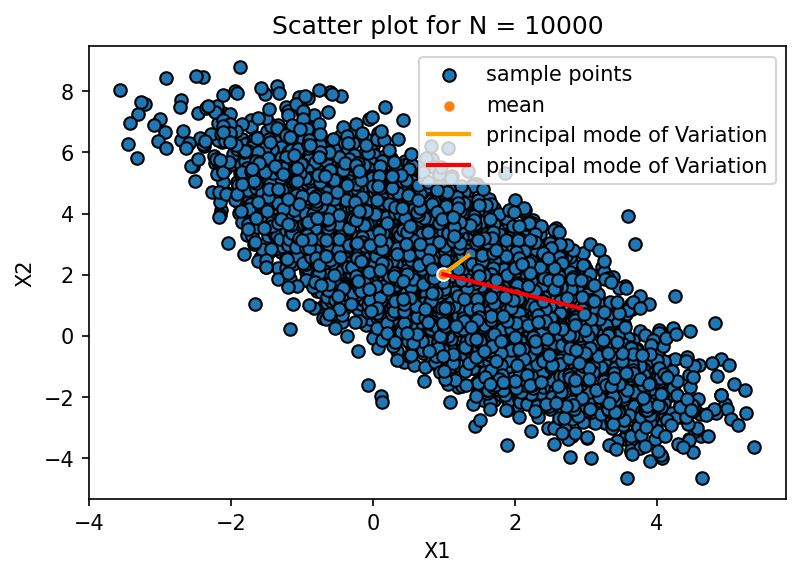

<Figure size 432x288 with 0 Axes>

In [184]:
plt.figure(dpi=150)
plt.title('Scatter plot for N = 10000')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1,X2,edgecolor ="black",label='sample points')
plt.scatter(start[0][0],start[1][0],edgecolor ="white",label='mean')#The red dot is the sample mean

x11,x21 = line(start,e1,v1)
x12,x22 = line(start,e2,v2)
plt.plot(x12,x22,color='orange',linewidth=2.0,label='principal mode of Variation')
plt.plot(x11,x21,color='red',linewidth=2.0,label='principal mode of Variation')

'''
# Vector origin location
X = [start[0][0]]
Y = [start[1][0]]

# Directional vectors
U1 = [v1[0]*sqrt(e1)]
V1 = [v1[1]*sqrt(e1)]

plt.quiver(X, Y, U1, V1, color='w', units='xy', scale=1)

# Directional vectors
U2 = [v2[0]*sqrt(e2)]  
V2 = [v2[1]*sqrt(e2)]

plt.quiver(X, Y, U2, V2, color='w', units='xy', scale=1)
'''

plt.legend()
plt.show()
plt.savefig('Scatter plot for N = 10000.png')

**For N = 100000:**

In [185]:
sample = random_samples(10**5,A,mean)#Generating samples

X1 = extract_X1(sample)
X2 = extract_X2(sample)
    
start = compute_sample_mean(sample)
eigenvalues,eigenvectors = np.linalg.eigh(compute_sample_covariance(sample))

In [186]:
e1 = eigenvalues[-1] #Largest eigenvalue
e2 = eigenvalues[-2]
v1 = eigenvectors[-1] #1st principal eigenvector
v2 = eigenvectors[-2] #2nd principal eigenvector

In [187]:
e1,e2,v1,v2

(5.006925229603338,
 0.4993050935192652,
 array([-0.49817366,  0.86707728]),
 array([-0.86707728, -0.49817366]))

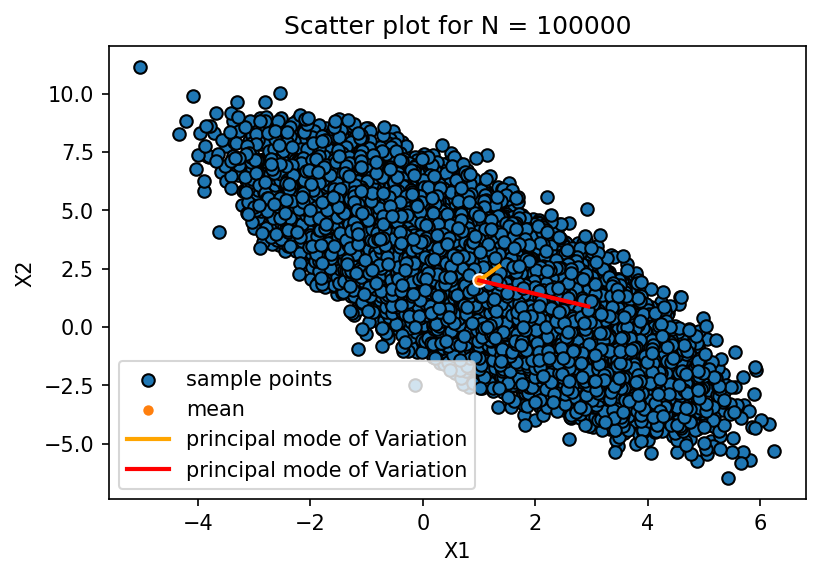

<Figure size 432x288 with 0 Axes>

In [188]:
plt.figure(dpi=150)
plt.title('Scatter plot for N = 100000')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1,X2,edgecolor ="black",label='sample points')
plt.scatter(start[0][0],start[1][0],edgecolor ="white",label='mean')#The red dot is the sample mean

x11,x21 = line(start,eigenvalues[-1],eigenvectors[:,-1])
x12,x22 = line(start,eigenvalues[-2],eigenvectors[:,-2])
plt.plot(x12,x22,color='orange',linewidth=2.0,label='principal mode of Variation')
plt.plot(x11,x21,color='red',linewidth=2.0,label='principal mode of Variation')

'''
# Vector origin location
X = [start[0][0]]
Y = [start[1][0]]

# Directional vectors
U1 = [v1[0]*sqrt(e1)]
V1 = [v1[1]*sqrt(e1)]

plt.quiver(X, Y, U1, V1, color='w', units='xy', scale=1)

# Directional vectors
U2 = [v2[0]*sqrt(e2)]  
V2 = [v2[1]*sqrt(e2)]

plt.quiver(X, Y, U2, V2, color='w', units='xy', scale=1)
'''

plt.legend()
plt.show()
plt.savefig('Scatter plot for N = 100000.png')